In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson, norm

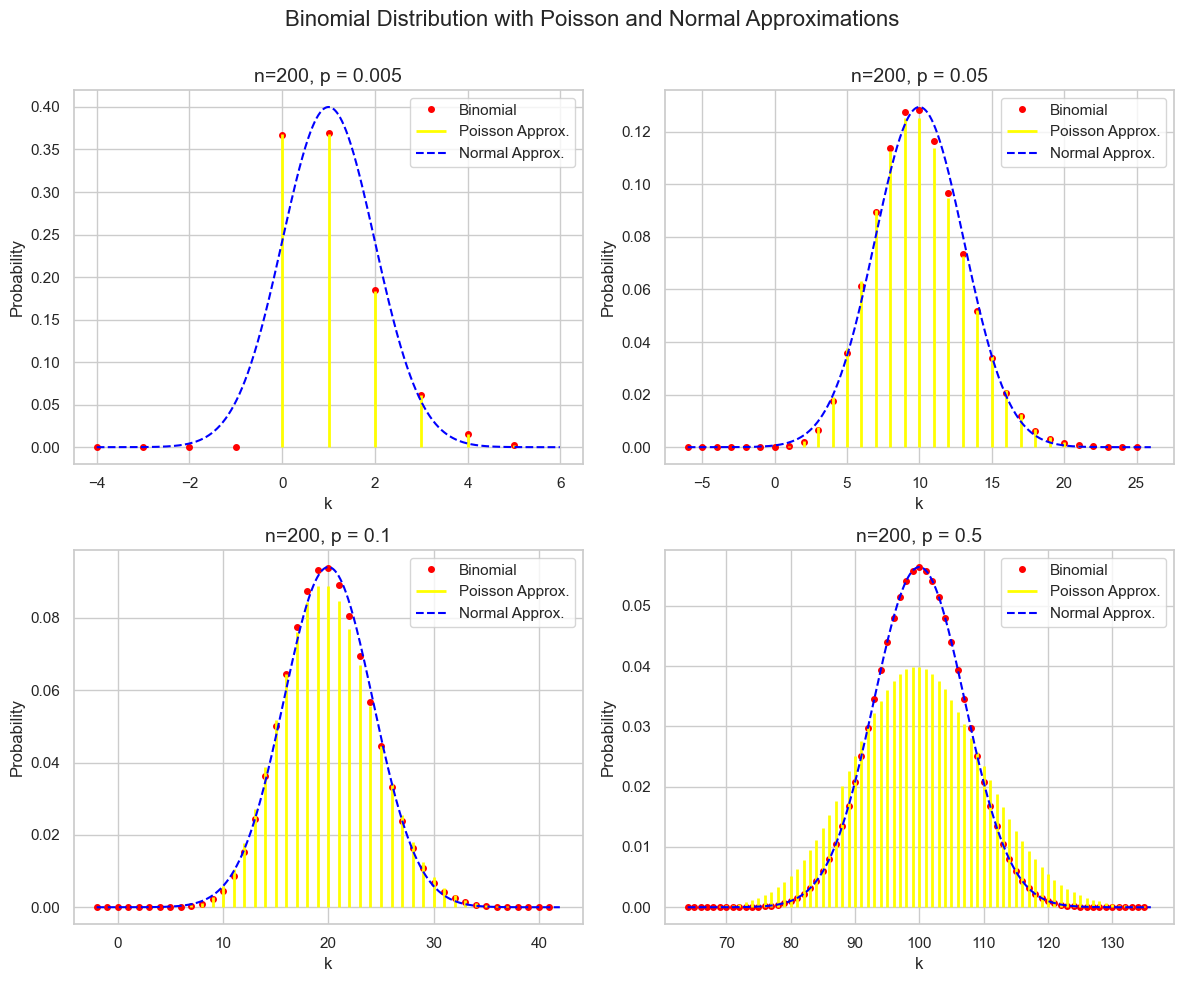

In [2]:
sns.set(style="whitegrid")

# Parameters
n = 200
probs = [0.005, 0.05, 0.1, 0.5]


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Binomial Distribution with Poisson and Normal Approximations', fontsize=16)


# Loop through each p value
for idx, (p, ax) in enumerate(zip(probs, axes.flat)):
    
    # Calculate mean and standard deviation for Normal approximation
    mean = n * p
    std = np.sqrt(n * p * (1 - p))
    
    # Define the x range
    lower = math.floor(mean - 5 * std)
    upper = math.ceil(mean + 5 * std)
    x_discrete = np.arange(lower, upper)
    x_continuous = np.arange(lower, upper, 0.01)
    
    # Binomial Distribution (scipy.stats.binom.pmf is used to compute the binomial PMF)
    binom_dist = binom.pmf(x_discrete, n, p)
    
    # Poisson Approximation (λ = np)
    poisson_dist = poisson.pmf(x_discrete, mean)
    
    # Normal Approximation (mean = np, std = sqrt(np(1-p)))
    normal_dist = norm.pdf(x_continuous, mean, std)
    
    # Plot the distributions with improved styles
    ax.plot(x_discrete, binom_dist, 'o', label='Binomial', color='red', markersize=4)
    # ax.bar(x_discrete, poisson_dist, label='Poisson Approx.', color='green')
    ax.vlines(x_discrete, ymin=0, ymax=poisson_dist, label='Poisson Approx.', color='yellow', linewidth=2)
    ax.plot(x_continuous, normal_dist, '--', label='Normal Approx.', color='blue')
    
    # Set the title and labels
    ax.set_title(f'n={n}, p = {p}', fontsize=14)
    ax.set_xlabel('k', fontsize=12)
    ax.set_ylabel('Probability', fontsize=12)
    
    # Add gridlines for a cleaner look
    ax.grid(True)
    
    # Add a legend
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Save the figure as a file (e.g., PDF format)
plt.savefig('binomial_poisson_normal_comparison.pdf')

# Show the plot
plt.show()